<a href="https://colab.research.google.com/github/mohamedhassan7862/NLP_Task/blob/main/NLP_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()  # Manually upload kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedhassan7862","key":"fc133903fa8176dd38fbc85690adffad"}'}

In [4]:
import os
import shutil

# Create the .kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct folder
shutil.move("kaggle.json", "/root/.kaggle/")

# Set the correct permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [5]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment


Dataset URL: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
License(s): CC-BY-NC-SA-4.0


In [6]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile("twitter-airline-sentiment.zip", "r") as zip_ref:
    zip_ref.extractall("airline_sentiment")

# Verify extraction
os.listdir("airline_sentiment")


['Tweets.csv', 'database.sqlite']

In [2]:
import pandas as pd

df = pd.read_csv("airline_sentiment/Tweets.csv")
df.head()  # Show first few rows


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("airline_sentiment/Tweets.csv")

# Check the first few rows
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df[['text', 'airline_sentiment']]

df.isnull().sum()


,0
text,0
airline_sentiment,0


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["sentiment"] = label_encoder.fit_transform(df["airline_sentiment"])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

df = df[['text', 'sentiment']]
df.head()


Label Mapping: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


,text,sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [6]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

df[["text", "clean_text"]].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [12]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_LEN = 50

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")  # OOV = Out of Vocabulary token
tokenizer.fit_on_texts(df["clean_text"])

sequences = tokenizer.texts_to_sequences(df["clean_text"])

padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding="post", truncating="post")

print("Example Sequence:", sequences[0])
print("Padded Example:", padded_sequences[0])


Example Sequence: [53, 212]
Padded Example: [ 53 212   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(padded_sequences)
y = np.array(df["sentiment"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 11712, Testing Samples: 2928


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

VOCAB_SIZE = 10000
EMBEDDING_DIM = 128
LSTM_UNITS = 64
MAX_LEN = 50
NUM_CLASSES = 3


In [11]:
model = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(LSTM_UNITS, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(LSTM_UNITS)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(NUM_CLASSES, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
BATCH_SIZE = 32
EPOCHS = 10

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)


Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.6677 - loss: 0.7834 - val_accuracy: 0.7927 - val_loss: 0.5268
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8433 - loss: 0.4103 - val_accuracy: 0.8053 - val_loss: 0.4995
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9055 - loss: 0.2688 - val_accuracy: 0.7951 - val_loss: 0.5764
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9277 - loss: 0.2061 - val_accuracy: 0.7879 - val_loss: 0.6521
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9514 - loss: 0.1402 - val_accuracy: 0.7879 - val_loss: 0.7043
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9631 - loss: 0.1130 - val_accuracy: 0.7835 - val_loss: 0.8850
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9704 - loss: 0.0835 - val_accuracy: 0.7794 - val_loss: 0.9157
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9752 - loss: 0.0783 - val

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7737 - loss: 1.2191
Test Accuracy: 0.7626


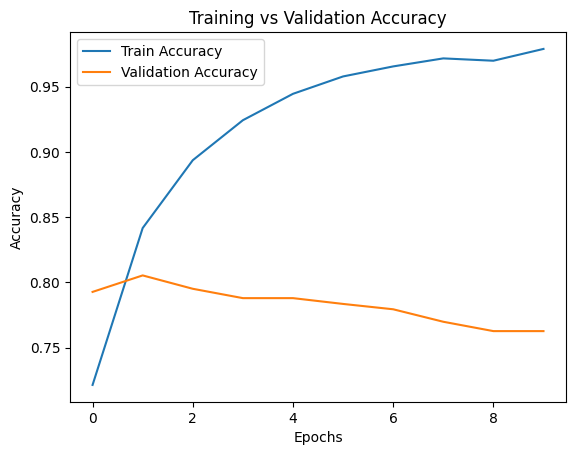

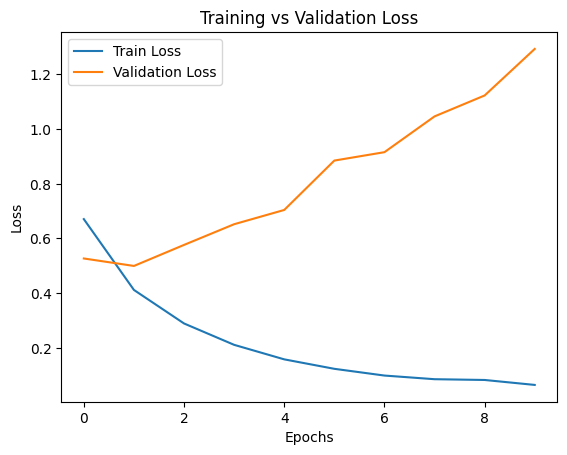

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [15]:
def predict_sentiment(text):
    text = clean_text(text)
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_LEN, padding="post")
    pred = model.predict(padded)
    sentiment = np.argmax(pred)
    sentiment_label = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_label[sentiment]

print(predict_sentiment("I love this airline! Great service."))
print(predict_sentiment("The flight was delayed for 3 hours. Terrible experience!"))
print(predict_sentiment("It was an okay flight, nothing special."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Neutral
